## Leer imagen

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
from collections import Counter

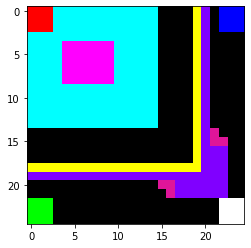

In [75]:
img = mpimg.imread("D:\SS\codigos\img\colores.bmp")
plt.imshow(img)

# UACI

In [182]:
img1 = mpimg.imread("D:\SS\codigos\img\house.bmp")
img2 = mpimg.imread("D:\SS\codigos\img\house_enc_ecb.bmp")
img1_r = img1[:,:,0]
img2_r = img2[:,:,0]

In [183]:
img1_r=img1_r.astype(float)
img2_r=img2_r.astype(float)

In [5]:
type(img1_r)

numpy.ndarray

In [6]:
#para un canal
#tienen que estar en enteros, si no sale otra cosa
def uaci(img1, img2):
    h,b=img1.shape
    return ( sum( sum(np.absolute(img1-img2)/255) ) )/(h*b)*100


In [7]:
def npcr(img1,img2):
    h,b=img1.shape
    return sum( sum( img1!=img2 ) )/( h * b )*100

In [8]:
u=uaci(img1_r, img2_r)
print(u)

30.303986493278956


In [9]:
n=npcr(img1_r, img2_r)
print(n)

99.61051940917969


## Correlation coefficient
- hay que seleccionar k pares de pixeles adjuntos
    - primero voy a seleccionar k pares x,y como corrdenadas de pixeles
    - Después a esas coordenadas le sumo 1 para obtener el pixel adyacente
        - x+1,y para horizontal
        - x,y+1 para vertical
        - x+1,y+1 para diagonal +
        - x+1,y-1 para diagonal -

In [10]:
def correlacion(img1,n_puntos):
    #primero seleccionamos los k puntos, por ahora lo hare para horizontal
    h, b = img1.shape
    x = np.random.choice(b-1,n_puntos,replace=True)
    y = np.random.choice(h-1,n_puntos,replace=True)

    #print(x)
    #print(y)
    x2=x+1  #para horizontal

    #ahora tengo que seleccionar los puntos según  las coordenadas que ya hice
    px1 = img1[x,y]
    px2 = img1[x2,y]

    #calculando los promedios
    px1m = np.mean(px1)
    px2m = np.mean(px2)

    #las restas px - px_mean 
    ppm1 = px1 - px1m
    ppm2 = px2 - px2m

    D1 = sum( ppm1**2 )
    D2 = sum( ppm2**2 )

    cc = sum( ppm1*ppm2 ) / np.sqrt( D1*D2 )

    return cc
    

In [11]:
n=1000
x = np.random.choice(25-1,n,replace=True)
y = np.random.choice(25-1,n,replace=True)
cc=np.corrcoef(img2_r[x,y],img2_r[x+1,y])
cc

array([[1.        , 0.07762583],
       [0.07762583, 1.        ]])

In [12]:
q=correlacion(img2_r,1000)
q

0.003028371107329196

In [13]:
img2_r.shape

(512, 512)

## MSE y PSNR


In [14]:
def mean_squared_error(img1, img2):
    h, b = img1.shape
    return sum( sum( ( img1 - img2 )**2 ) ) / ( h * b )

In [15]:
def psnr(img1, img2):
    mse = mean_squared_error(img1, img2)
    return 20 * math.log10( 255 / (math.sqrt(mse)) )

## Histograma

In [78]:
def histograma(img1, print = False):
    #asumiendo que el max es 255
    #partiendo en 256 bins, hay que poner 1 bin de más
    #density para que me entregue la probabilidad de ese valor
        #eso también me sirve para la probabilidad de entropía
    hist, bins = np.histogram(np.ravel(img1), bins = range(257), density=True)

    if(print):
        plt.bar(bins[:256], hist, align = 'center')
        plt.title('Histograma') 
        plt.ylabel('Probabilidad') 
        plt.xlabel('Bins')  

        plt.show()

    return hist, bins

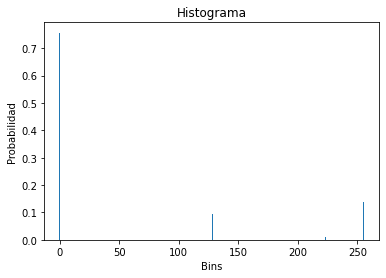

In [79]:
histograma(img1_r)

## Entropia Global
Para hacer lo de la entropía local, seguramente tmb sería akgo así pero por bloques

In [204]:
#usare lo mismo que el histograma ya que ya me da la probailidad
#tmb se podría usar counter, pero tiene un diccionario, aun asi podría solo extraer los valores
def entropia(img1):
    #se supone que esto ya me da la probabilidad de cada intensidad de pixel(0...255)
        #pero eso me da probabilidades de 0, y a cero no se le puede sacara log
            #podria usar un filter, pero...
    #hay 256 valores diferentes
    #usar count es mucho más rápido que calcular los valores distintos y calcular las ocurrencias
    n = img1.shape[0] * img1.shape[1]
    dist = Counter(img1.ravel())
    prob = np.array(list(dist.values())) / n
    #prob es una lista con las probabilidades
    # usar * lo hace element wise, no multiplicación de vectores
    #print(prob)
    return sum( prob * np.log2(1.0 / prob) )


In [206]:
entropia(img2_r)

7.999250230344181

In [98]:
z=np.array(range(5))
y=np.array(range(5))
z*z

array([ 0,  1,  4,  9, 16])

In [200]:
tic = time.perf_counter()
n=img1_r.shape[0]*img1_r.shape[1]
cl = Counter(img1_r.ravel())
p=np.array(list(cl.values()))/n
toc = time.perf_counter()
print(f"Downloaded the tutorial in {toc - tic:0.4f} seconds")

Downloaded the tutorial in 0.0754 seconds


In [138]:
sum(p)

1.0

In [130]:
list(dict(cl).values())

[86, 473, 60, 6]

In [193]:
tic = time.perf_counter()
n=img1_r.shape[0]*img1_r.shape[1]
vals=set(img1_r.ravel())
qq =np.array( [np.count_nonzero(img1_r == v) for v in vals]  ) / n
toc = time.perf_counter()
print(f"Downloaded the tutorial in {toc - tic:0.4f} seconds")

Downloaded the tutorial in 0.1123 seconds


In [148]:
qq

array([0.7568, 0.0096, 0.096 , 0.1376])

In [150]:
import time
